# Convolutional Neural Networks Basics 

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


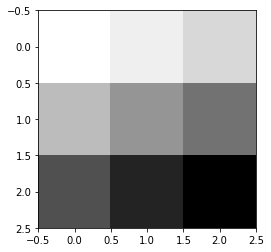

In [14]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
# 3*3*1 image
# 마지막 1은 색의 표현 체계(?)를 말함. rgb면 3인데 여기는 아님 흑백 조절임.
plt.imshow(image.reshape(3,3), cmap = 'Greys')
# 맨 앞의 1은 몇개의 이미지인지를 뜻함

## 1 filter (2,2,1,1) with padding : Valid
weight.shape = 1 filter(2,2,1,1)
* filter의 이미지 사이즈가 2x2이고 color는 1개로 표현되고, 마지막 1은 filter 개수를 뜻함

![image](https://camo.githubusercontent.com/feef340e25d2a10a0bd1e96352777a32e4137f2a/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32343833333337352f63306439633236322d316366392d313165372d396566632d3564643666653066656462302e706e67)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


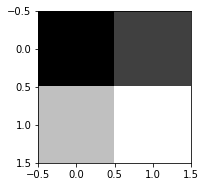

In [4]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
# eval() is a shortcut for calling tf.get_default_session().run(t)
conv2d_img = conv2d.eval()
print("conv2d_img.shape ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
    # conv layer
    print(one_img.reshape(2,2))
    # conv layer 이미지화
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

## 1 filter (2,2,1,1) with padding:SAME

![simple cnn](https://camo.githubusercontent.com/8e45f346468e2ebf8a27ae82c24776cc3b530ce6/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32343833333338312f66643031383639652d316366392d313165372d396435392d6466303863376336653563342e706e67)

image.shape  (1, 3, 3, 1)
weight.shape  (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


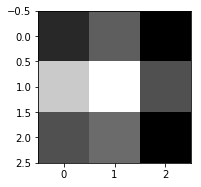

In [5]:
print("image.shape ", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]])
print("weight.shape ",weight.shape)
# padding이 SAME인 것은 stride와 별개로 input과 동일하게 output 사이즈가 나오도록 한다.
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3) 

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
3개의 필터를 사용한 output
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


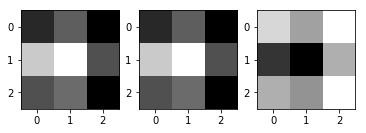

In [15]:
# filter의 개수가 3개일 때
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

print("3개의 필터를 사용한 output")
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## MAX POOLING

![max pooling](https://camo.githubusercontent.com/fbec3b209ab152abdfabf63f081c3fd047d5cffd/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333333373637362f62643135346461322d666333302d313165362d383838632d6438366263323230363036362e706e67)

![pooling](https://camo.githubusercontent.com/04831ba0a6fcb63640f3ea2c3b5d8479c08f8f49/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334303335352f61346264336330382d666336662d313165362d386139392d3165336262626538363733332e706e67)

In [7]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


## SAME: Zero paddings 

![same](https://camo.githubusercontent.com/9867aae562c82293ec18d75eaee213e723b3cc88/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334303333372f37316232373635322d666336662d313165362d393665662d3736303939383735356637372e706e67)

In [8]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
# padding을 SAME으로 지정해서 패딩 0이 우하만 있는 것
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())
# 지금 결과는 input이랑 동일한데 그것은 우연임.

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## MNIST data 이용하기 

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

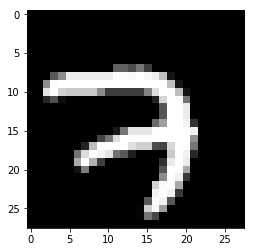

In [10]:
# train set의 첫번째 숫자 이미지
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)


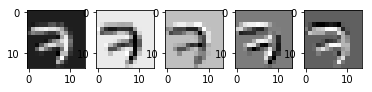

In [11]:
sess = tf.InteractiveSession()
# -1인 것은 있는 것 다
# 28 x 28
# 1은 color
img = img.reshape(-1,28,28,1)
# filter size 3x3
# 1 color
# filter 개수 5
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# stride를 2로 부여함
# padding : SAME이지만 stride가 2이기 때문에 14x14가 output size임
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
# filter가 5개라서 결과도 5개 나옴

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


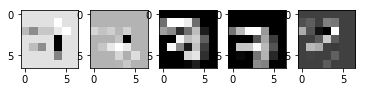

In [12]:
# kernel size가 2x2,
# stride가 2이므로 padding이 SAME이지만 output은 7x7임
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')